# Data Visualization in Python

Data viz often bookends a data scientist's work, at the beginning with exploratory data analysis and at the end with using visualizations to tell stories about the data and the data scientist's findings. In python, there are a variety of libraries that allow for dynamic and interesting graphs for both of these use cases.   

Two of those libraries are matplotlib and seaborn. 
Matplotlib is a 2D plotting library which has the potential to graph a large variety of graphs, and is used heavily in the python community, especially for exploratory data analysis. It is designed to be syntactically similar to matlab.  

### Setup: Matplotlib

Matplotlib is automatically included when downloading the Anaconda package. For those who haven't downloaded Anaconda but want to use matplotlib, install matplotlib with `pip install matplotlib` 

If you are on Windows, run that command from the Anaconda Command Prompt

If you are on Mac OS X, run that command from the terminal

In [3]:
%matplotlib inline
'''
IPython features "magic functions", which all begin with a percent symbol.
Some other functions include timers and running shell commands
%matplotlib inline tells IPython to display plots in the notebook 
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Setup: Seaborn

Another popular library in python is called **seaborn**, a statistical graphing library for Python. Seaborn is built on top of **matplotlib**, but provides a high level API and aesthetically pleasing graphs. Seaborn can use data from **pandas**. Seaborn also handles things such as automatically cleaning data. As a result, seaborn fits in perfectly with the typical scientific software stack: SciPy, NumPy, pandas, matplotlib. 


The documentation for seaborn is very thorough and can be found [here](https://stanford.edu/~mwaskom/software/seaborn/api.html). 

Install seaborn with `conda install seaborn`

If you are on **Windows**, run that command from the Anaconda Command Prompt

If you are on **Mac OS X**, run that command from the terminal

In [4]:
import seaborn as sns

/Users/Delaney/anaconda3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# For Hire Vehicle Pickups in NYC

For the rest of this workshop, we'll be working with For Hire Vehicle data



## EDA: Exploratory Data Analysis

Explore data, search for structure of data, understand distributions of values, prepare yourself for data analysis

### Cleaning Data

In [5]:
pd.read_csv('uberdaycount.csv').head()
# sometimes our data is given to us in a less-than-ideal format. 
# we should utlize the .read_csv parameters and .rename

,Unnamed: 0,day,0
0,0,2014-04-01,14546
1,1,2014-04-02,17474
2,2,2014-04-03,20701
3,3,2014-04-04,26714
4,4,2014-04-05,19521


In [6]:
# answer 

uberdaycount = pd.read_csv('uberdaycount.csv', index_col=0).rename(columns={'0':'rides_per_day'})
uberdaycount.head()

lyft = pd.read_csv('lyft.csv', index_col=0).rename(columns={'start_lat':'latitude', 'start_lng':'longitude'})
lyft.head()

,latitude,longitude,lyft_time,minutes,hour
0,40.64705,-73.77988,2014-09-04 09:51:00,591,9.850000
1,40.74916,-73.98373,2014-08-27 21:13:00,1273,21.216667
2,40.64065,-73.97594,2014-09-04 14:16:00,856,14.266667
3,40.75002,-73.99514,2014-09-04 16:08:00,968,16.133333
4,40.76715,-73.98636,2014-08-28 02:41:00,161,2.683333


In [7]:
# to make it easier to work with the 'date' column, we 
# will use the pandas function to_datetime to convert
# the 'date' column into datetime objects 

print('read more about datetime here:', 'https://pandas.pydata.org/pandas-docs/stable/timeseries.html')

ubercars = pd.read_csv('Uber-Jan-Feb-FOIL.csv')
ubercars.head()

read more about datetime here: https://pandas.pydata.org/pandas-docs/stable/timeseries.html


,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [8]:
# answer 

ubercars['date'] = pd.to_datetime(ubercars['date'])
ubercars.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,2015-01-01,190,1132
1,B02765,2015-01-01,225,1765
2,B02764,2015-01-01,3427,29421
3,B02682,2015-01-01,945,7679
4,B02617,2015-01-01,1228,9537


### Exploratory Data Analysis (EDA)

What do we want to know? What are we hoping to find? 

* structure
* granularity 
* scope
* time
* faithfulness

We already know the **structure** of our data, because we composed it ourselves. 

For **granularity**, we need to look at what each record represents. Our records are our data corresponding to each primary key. A primary key is unique to that data record. It helps us differentiate between records. For our first two tables, the primary key is simply a uniquely given number. Uberdaycount tells us how many ubers were called in a day. Lyft tells us the hour of unique rides. For **time**, we know this data is from 2014-2015. As for **faithfulness**, this is only the data of vehicle rides in New York City, and may not be similar to trends in other populations. 

How do we assess **scope**, or how complete my data is?

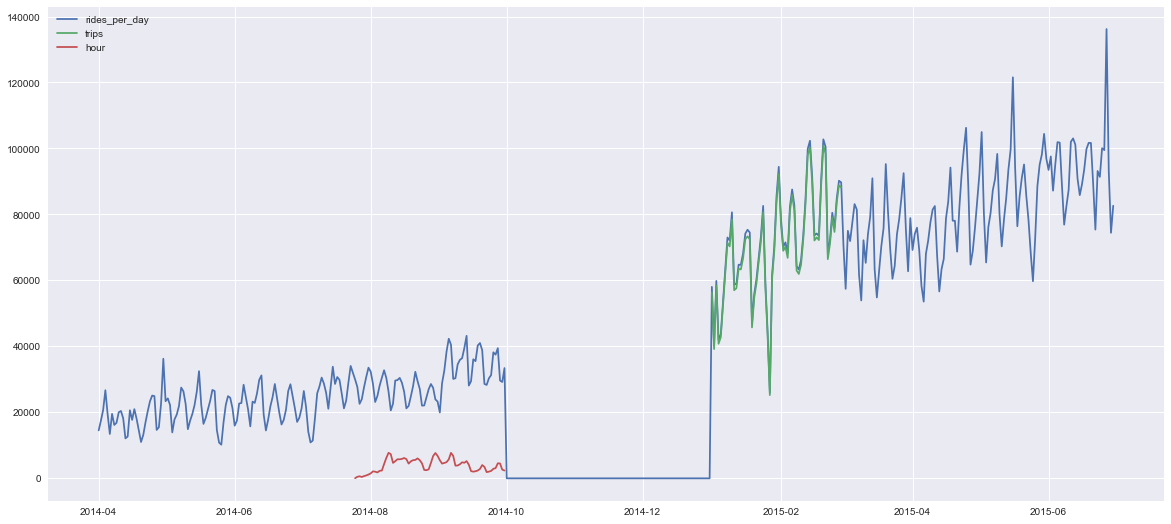

In [9]:
# we can make a time series table of all the data we have

uberdaycount['day'] = pd.to_datetime(uberdaycount['day'])
lyft['lyft_time'] = pd.to_datetime(lyft['lyft_time'])

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(211)
ax.plot(uberdaycount.set_index('day')['rides_per_day'])
ax.plot(ubercars.groupby('date').sum()['trips'])
ax.plot(lyft.set_index('lyft_time').resample('D').count()['hour'])
ax.legend()

Timeseries graphs, groupby functions, and other functions like value_counts all help us asses scope of our data. As you can see, we have found a gap in our uberdaycount data. Also note that in early exploratory data analysis, we are looking for clues, not conclusions. Our graphs can be messy and unlabeled. 

Now that we've got a better idea of our data, we can start asking questions. Some ideas to start us off:

* What time do people like to use Lyft in NYC? 
* What are the weekly trends over time for these FHV services?

In [ ]:
# Weekly Trends 

# For weekly information, we are going to use a time series feature 
# in pandas known as resampling. 

# answer 

uberweek = uberdaycount.set_index('day').resample('W').sum()['rides_per_day']
lyftweek = lyft.set_index('lyft_time').resample('W').count()['latitude']

In [ ]:
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(121)

ax1.plot(uberweek)
ax1.plot(lyftweek)
ax1.legend()

Doesn't seem to be many lyft riders in late 2014, or at least, the data on them wasn't collected completely! Since the lyft data has such a small time span, weekly trends may not be something we want to visually share. But, looking at the granularity of the lyft dataset, we see we're also given minute (of the day) and hour (of the day).

In [ ]:
# Hourly Trends 

# Now we will use a histogram

fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(121)

# answer

ax1.hist(lyft['hour'],bins=24)
lyft['hour'].hist(bins=24)

## Data Storytelling

Here comes the fun part! Let's use seaborn or more advanced matplotlib techniques to beautifully showcase our findings. Once you find the results of your analysis, approaches to illustrating statistical concepts and findings in seaborn. 

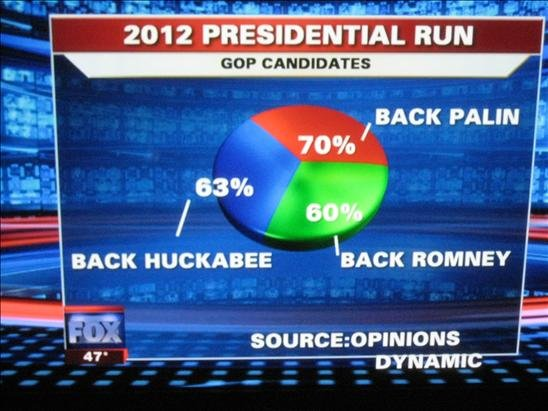 

In [10]:
from matplotlib import style
# Seaborn's visual styling was inspired by ggplot,
# so this style should be very similar:
style.use('ggplot')

In [12]:
# We want to compare the number of riders for two years
# First, we have to get the intersection of dates 

# We will use more date time functions and create variables to help us

# answer

uberdaycount['date'] = uberdaycount['day'].dt.strftime('%m-%d')
uberdaycount['year']= uberdaycount['day'].dt.year


dates = uberdaycount.groupby('date').count()['year'] > 1
dates = list(dates[dates == True].index)

uberdaycount2 = uberdaycount[uberdaycount['date'].isin(dates)]

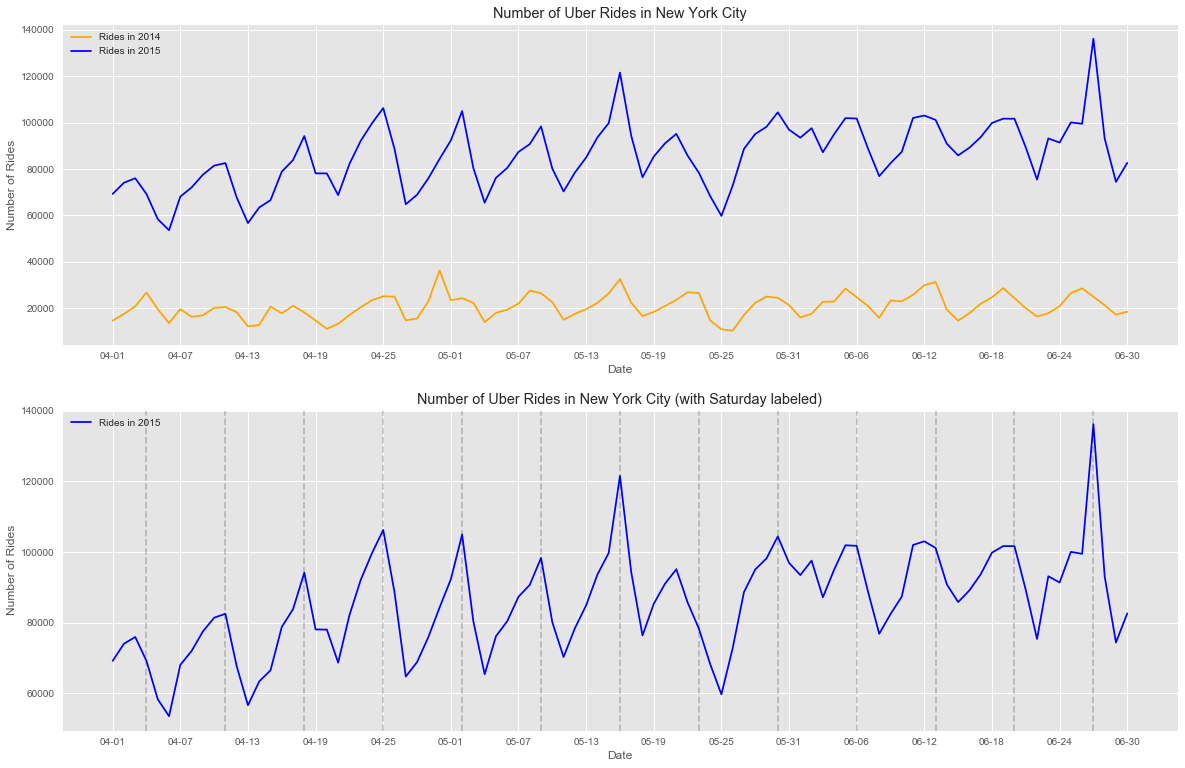

In [23]:
uber2fig = plt.figure(figsize=(20,13))
uber2 = uber2fig.add_subplot(211)

#answer 

uber2.plot(uberdaycount2[uberdaycount2['year'] == 2014][['rides_per_day']], label='Rides in 2014', color='orange')
uber2.plot(uberdaycount2[uberdaycount2['year'] == 2015].reset_index()[['rides_per_day']], label='Rides in 2015', color='blue')


plt.xticks(np.arange(len(dates))[0::6], dates[0::6], rotation='horizontal')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('Number of Uber Rides in New York City')
plt.legend()
 
##    
    
uber22 = uber2fig.add_subplot(212)

# answer

uber22.plot(uberdaycount2[uberdaycount2['year'] == 2015].reset_index()[['rides_per_day']], label='Rides in 2015', color='blue')
plt.xticks(np.arange(len(dates))[0::6], dates[0::6], rotation='horizontal')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('Number of Uber Rides in New York City (with Saturday labeled)')
plt.legend()

# making more variables 

dayofweek = uberdaycount2[uberdaycount2['year'] == 2015].reset_index()['day'].dt.weekday == 5
dayofweek = list(dayofweek[dayofweek == True].index)

# answer

for x in list(dayofweek):
     plt.axvline(x, ls='dashed', color='black', alpha=0.2)

plt.show()

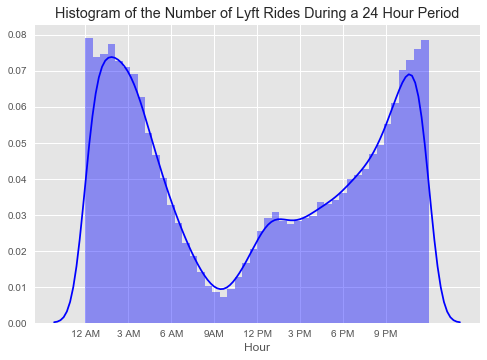

In [24]:
# Now a basic example of seaborn 

# answer 

sns.distplot(lyft['hour'], color='blue')


plt.xlabel('Hour')
plt.title('Histogram of the Number of Lyft Rides During a 24 Hour Period')

# Relabeling the x-axis to make it more readable
# Can use matplotlib formatting to some extent

plt.xticks(np.arange(0,24)[0::3], ['12 AM', '3 AM', '6 AM', '9AM', '12 PM', '3 PM', '6 PM', '9 PM'], rotation='horizontal')

plt.show()

# Examples of Visualizations

[Craigslist Missed Connections](http://www.vox.com/a/craigslist-missed-connections/i-analyzed-10-000-craigslist-missed-connections-here-s-what-i-learned)

[Who Marries Who](http://www.bloomberg.com/graphics/2016-who-marries-whom/)

[18th and 19th Century Ship Logs](https://i.imgur.com/dmaEsgO.png)